In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers.legacy import Adam

In [3]:
import kagglehub

# Download latest version
#path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

#print("Path to dataset files:", path)

Path to dataset files: C:\Users\praty_19k9tl9\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1


In [25]:
sample_file = "Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00095.wav" #Downloads/Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00000.wav
#/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav

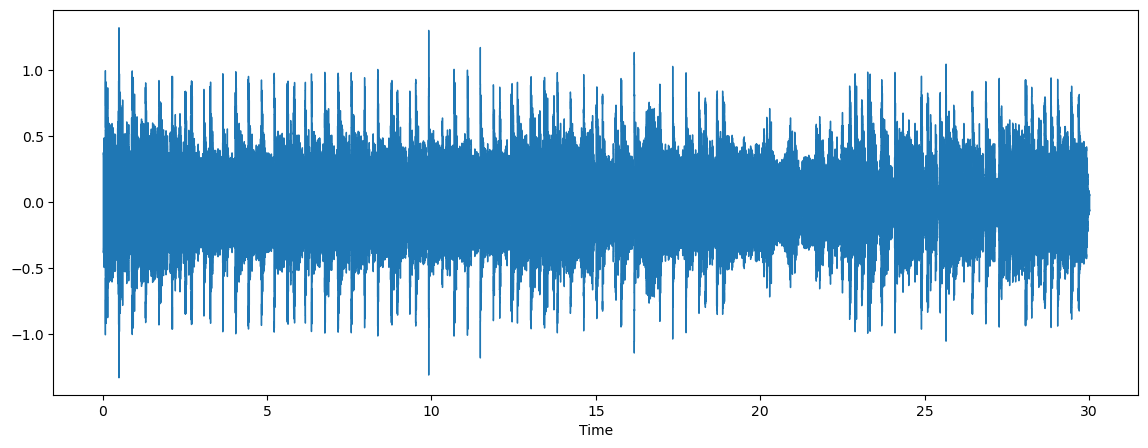

In [27]:
#Analysing Data

y,sr = librosa.load(sample_file,sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

In [29]:
y.shape

(1323588,)

In [31]:
#Playing the sound

from IPython.display import Audio
Audio(data=y, rate=sr)

In [33]:
y

array([-0.12319544, -0.18029757, -0.20139953, ..., -0.00091756,
       -0.00429644, -0.00314427], dtype=float32)

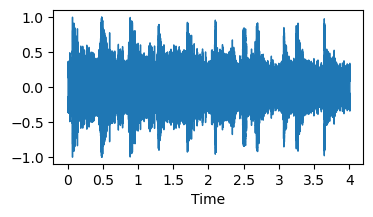

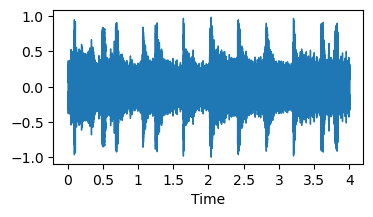

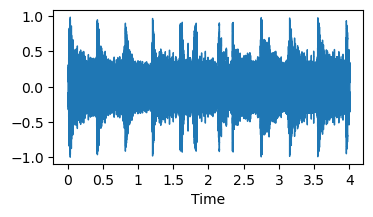

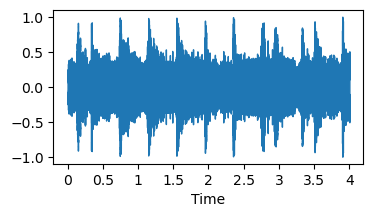

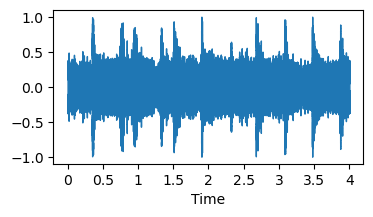

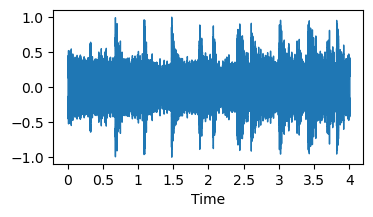

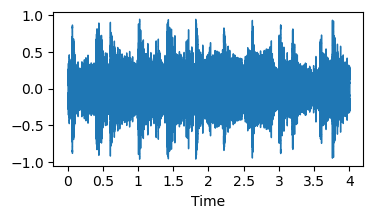

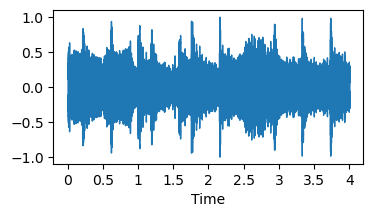

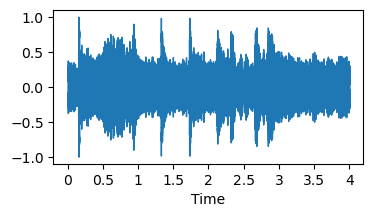

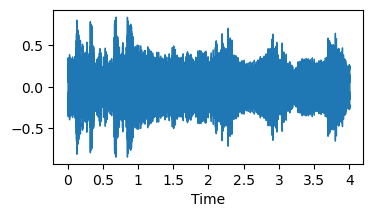

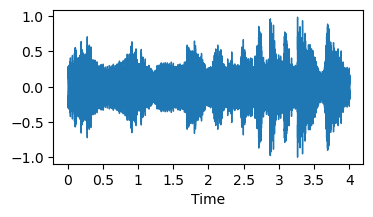

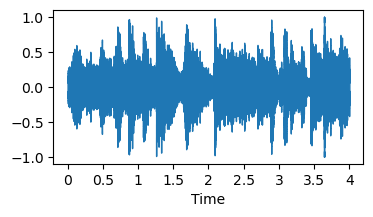

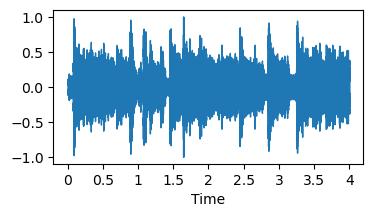

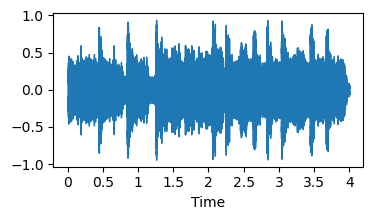

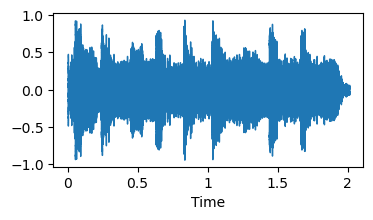

In [35]:
#Visualizing audio parts

# audio_path = "Downloads/archive/Data/genres_original/blues/blues.00000.wav"
y, sr = librosa.load(sample_file, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

In [37]:
##Spectography

#Plotting Mel Spectrogram of Entire Audio

def plot_melespectrogram(y,sr):
    #Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #Visualize the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()

In [39]:
y,sr = librosa.load(sample_file, sr=44100)

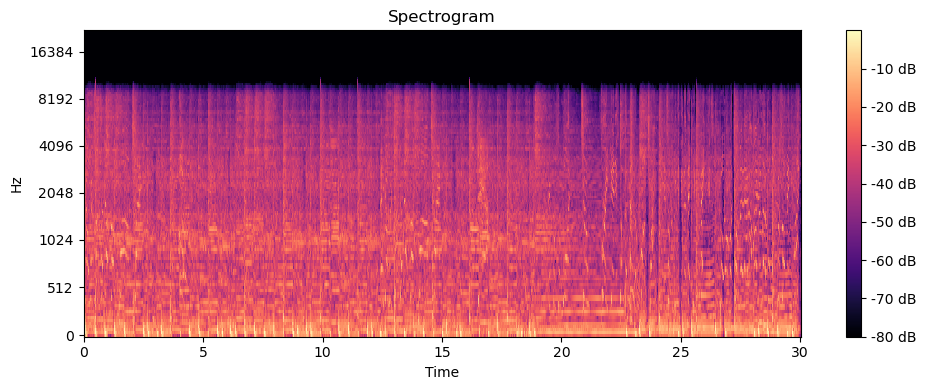

In [41]:
plot_melespectrogram(y,sr)

In [43]:
def plot_melspectrogram_chunks(y,sr):
    #define the duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2
    
    #Convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #Calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #iterate over each chunks
    for i in range(num_chunks):
        #Calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        #Extract the chunk audio
        chunk = y[start:end]
        #Melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #Visualize the spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

In [45]:
y,sr = librosa.load(sample_file,sr=44100)

(128, 345)


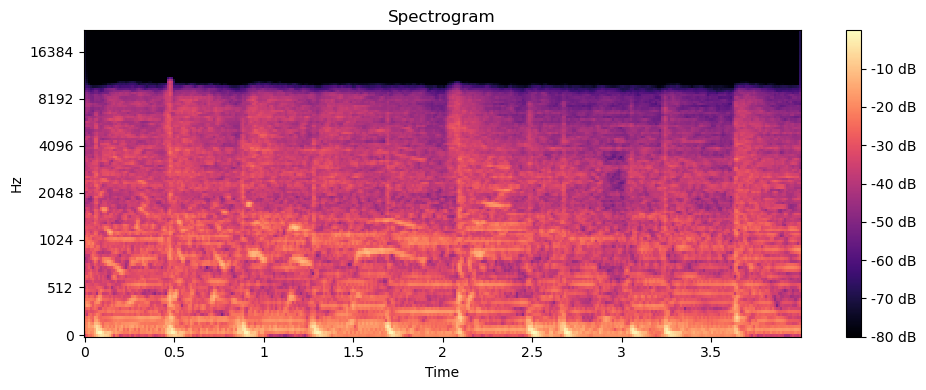

(128, 345)


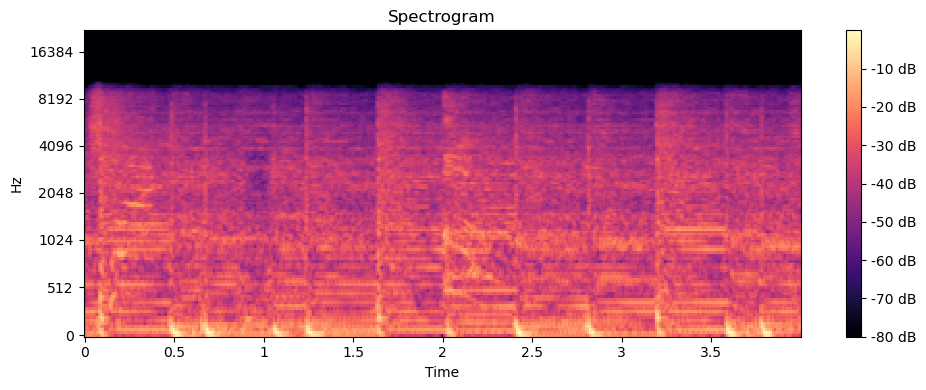

(128, 345)


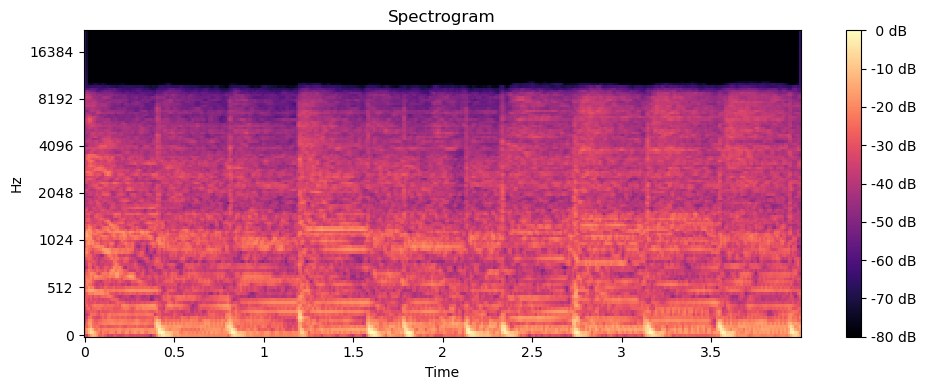

(128, 345)


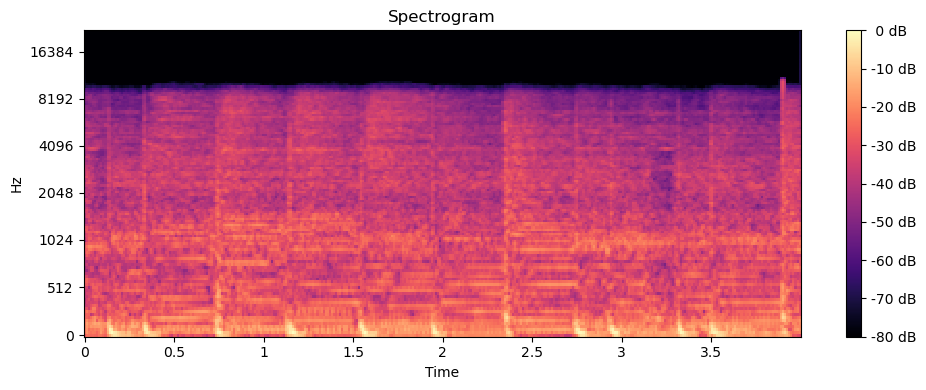

(128, 345)


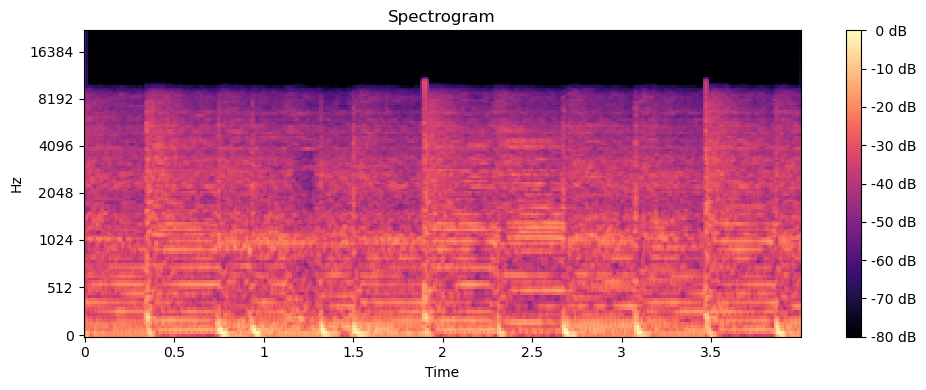

(128, 345)


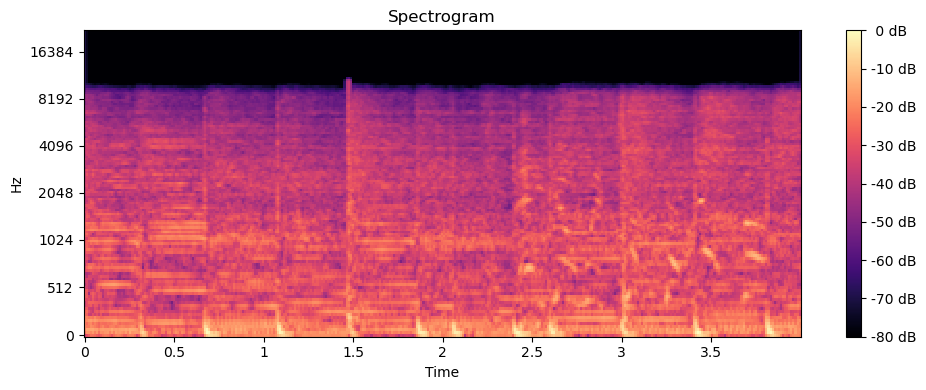

(128, 345)


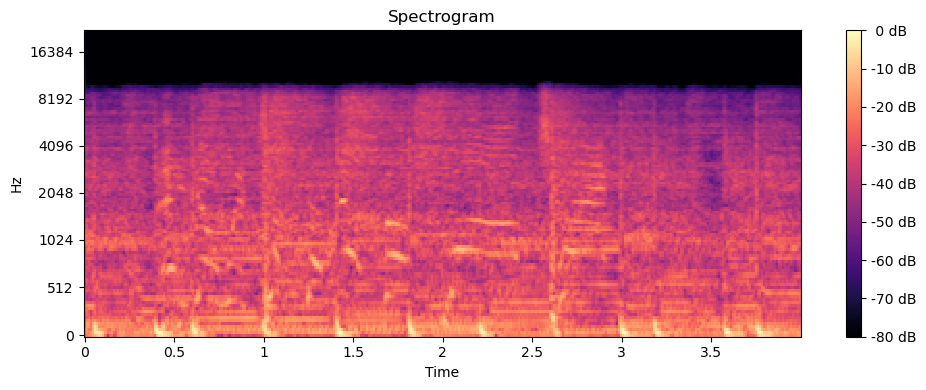

(128, 345)


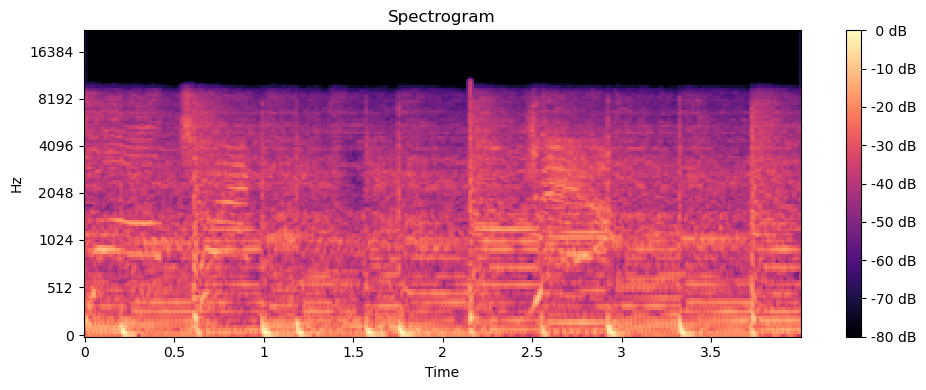

(128, 345)


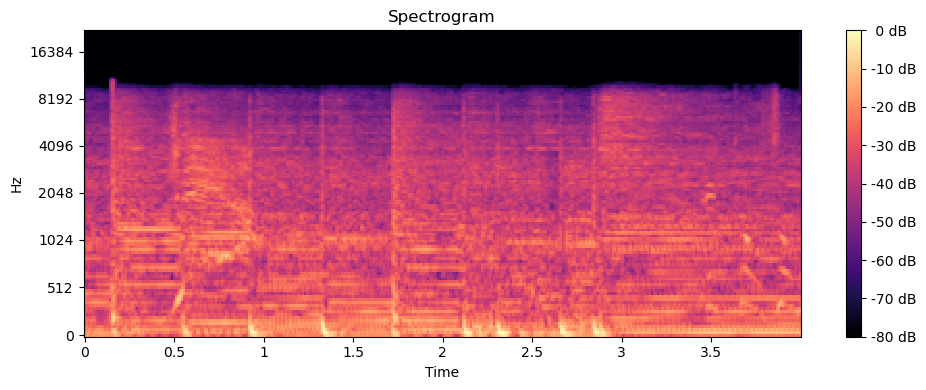

(128, 345)


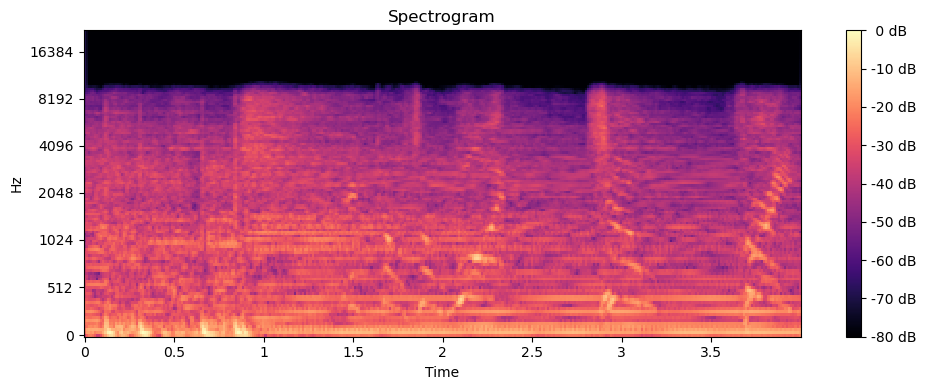

(128, 345)


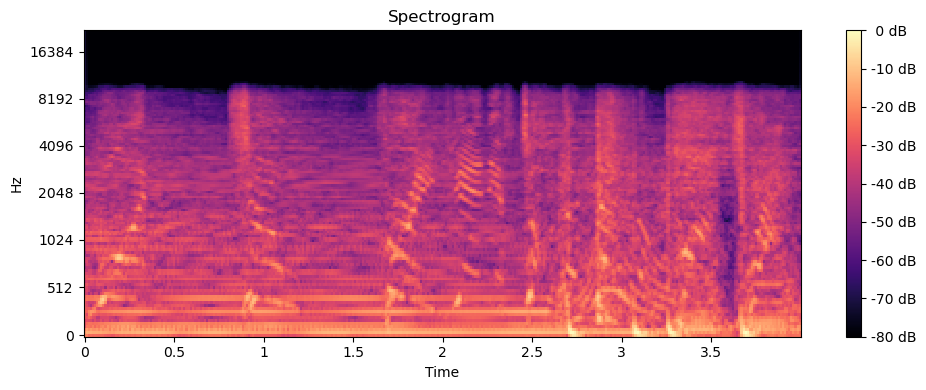

(128, 345)


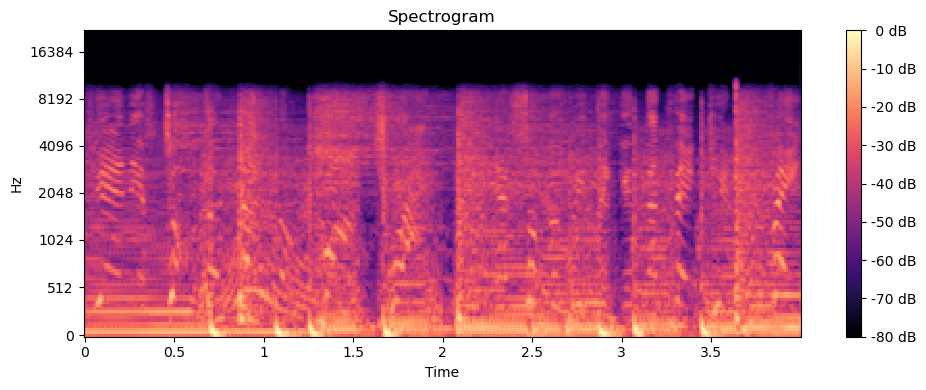

(128, 345)


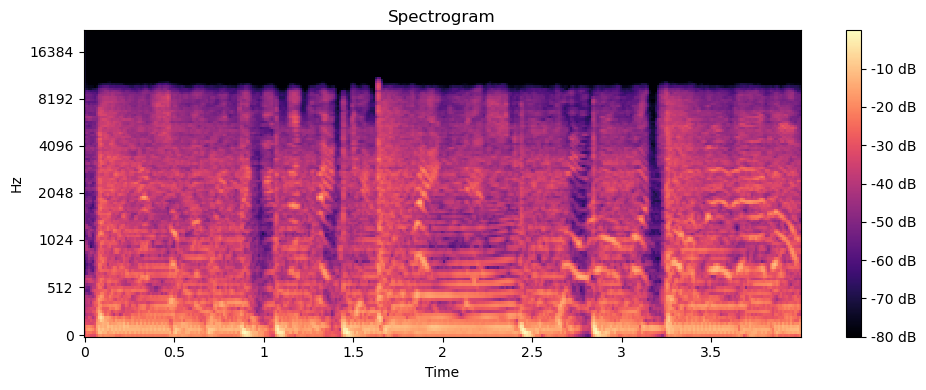

(128, 345)


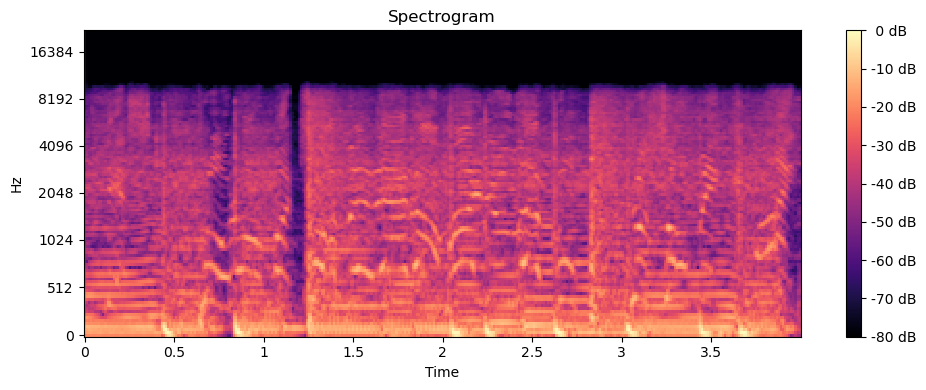

(128, 174)


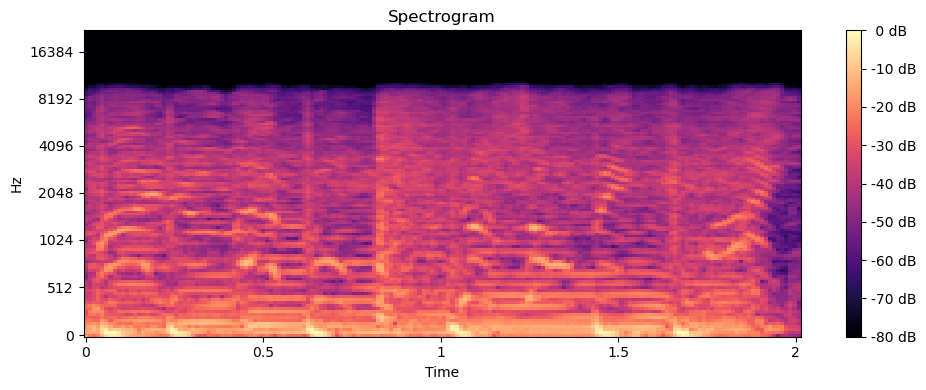

In [47]:
plot_melspectrogram_chunks(y,sr)

In [99]:
##Data Pre-processing

#define your folder structure
data_dir = "Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original" #Downloads/archive/Data/genres_original
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [101]:
from tensorflow.image import resize
#Load and preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #Performing Preprocessing
                #define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2
                
                #Convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                #Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
                
                #iterate over each chunks
                for i in range(num_chunks):
                    #Calculate start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    #Extract the chunk audio
                    chunk = audio_data[start:end]
                    #Melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Resize matrix based on provided target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    #Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    #Return
    return np.array(data),np.array(labels)

In [103]:
# for filename in os.listdir(data_dir):
#     if filename.endswith('.wav'):
#         file_path = os.path.join(data_dir, classes)
#         try:
#             audio_data, sample_rate = librosa.load(file_path, sr=None)
#             # Process audio data here
#         except Exception as e:
#             print(f"Error loading {filename}: {e}")
#             continue
# import librosa
# import soundfile as sf
# import os

# def load_and_preprocess_data(data_dir, classes, target_shape=(128, 128)):
#     data = []
#     labels = []
    
#     for label in classes:
#         class_dir = os.path.join(data_dir, label)
#         for filename in os.listdir(class_dir):
#             if filename.endswith('.wav'):
#                 file_path = os.path.join(class_dir, filename)
#                 try:
#                     # Try loading the file using librosa
#                     audio_data, sample_rate = librosa.load(file_path, sr=None)
                    
#                     # Optionally, perform any preprocessing here
#                     # For example, trim or reshape the audio_data to target_shape
                    
#                     # Append the valid audio data and label to lists
#                     data.append(audio_data)
#                     labels.append(label)
                    
#                 except (librosa.util.exceptions.ParameterError, librosa.util.exceptions.NoBackendError, sf.LibsndfileError):
#                     # If there's an issue with the file (e.g., no audio or invalid format), skip it
#                     print(f"Skipping invalid audio file: {file_path}")
    
#     return data, labels

In [105]:
import os
import librosa

def load_and_preprocess_data(data_dir, classes, min_file_size=1000):  # Set a minimum file size threshold
    data = []
    labels = []
    
    for label in classes:
        class_dir = os.path.join(data_dir, label)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                
                # Check if the file is the problematic one and skip it #jazz.00054.wav
                if file_path == '/Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00002.wav':
                    print(f"Skipping known problematic file: {file_path}")
                    continue

                # Check if the file size is above the minimum threshold
                if os.path.getsize(file_path) < min_file_size:
                    print(f"Skipping empty or small file: {file_path}")
                    continue

                try:
                    # Try loading the audio file
                    audio_data, sample_rate = librosa.load(file_path, sr=None)
                    
                    # Append valid audio data and label
                    data.append(audio_data)
                    labels.append(label)
                    
                except Exception as e:
                    # Catch any error that occurs while loading the file
                    print(f"Error loading file {file_path}: {e}")
    
    return data, labels

In [107]:
import os
import numpy as np
import librosa
from tensorflow.image import resize

def load_and_preprocess_data(data_dir, classes, target_shape=(150,150)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing--", class_name)

        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)

                try:
                    # Try to load the audio file using librosa
                    audio_data, sample_rate = librosa.load(file_path, sr=None)
                    
                    # Check if the audio data is empty or has issues
                    if len(audio_data) == 0:
                        print(f"Skipping empty or corrupted file: {file_path}")
                        continue

                except Exception as e:
                    # Catch and handle any exception (e.g., file format issues)
                    print(f"Error loading file {file_path}: {e}")
                    continue

                # Define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2
                
                # Convert duration to samples
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                # Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
                
                # Iterate over each chunk
                for i in range(num_chunks):
                    # Calculate start and end indices of the chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples
                    
                    # Extract the chunk of audio
                    chunk = audio_data[start:end]
                    
                    # Check if the chunk is long enough to process
                    if len(chunk) < chunk_samples:
                        print(f"Skipping incomplete chunk from file: {file_path}")
                        continue

                    # Mel-spectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
                    
                    # Resize the spectrogram to the target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                    
                    # Append the processed data and labels
                    data.append(mel_spectrogram)
                    labels.append(i_class)

    # Return the data and labels as NumPy arrays
    return np.array(data), np.array(labels)

In [109]:
data,labels = load_and_preprocess_data(data_dir,classes)

Processing-- blues
Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\blues\blues.00000.wav
Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\blues\blues.00001.wav
Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\blues\blues.00002.wav
Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\blues\blues.00003.wav
Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\blues\blues.00004.wav
Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\blues\blues.00005.wav
Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\blues\blu

C:\Users\praty_19k9tl9\AppData\Local\Temp\ipykernel_36488\875459638.py:20: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load(file_path, sr=None)
C:\Users\praty_19k9tl9\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\jazz\jazz.00055.wav
Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\jazz\jazz.00056.wav
Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\jazz\jazz.00057.wav
Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\jazz\jazz.00058.wav
Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\jazz\jazz.00059.wav
Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\jazz\jazz.00060.wav
Skipping incomplete chunk from file: Project/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original\jazz\jazz.00061.wav
Skipping incomplete 

In [111]:
data.shape

(13977, 150, 150, 1)

In [113]:
labels.shape

(13977,)

In [115]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes)) # Converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [117]:
labels.shape

(13977, 10)

In [119]:
# Splitting of Dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [121]:
#Building of Model

model = tf.keras.models.Sequential()

In [123]:
X_train[0].shape

(150, 150, 1)

In [125]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\praty_19k9tl9\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [127]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [129]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [131]:
model.add(Dropout(0.3))

In [133]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [135]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [137]:
model.add(Dropout(0.3))

In [139]:
model.add(Flatten())

In [141]:
model.add(Dense(units=1200,activation='relu'))

In [143]:
model.add(Dropout(0.45))

In [145]:
#Output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [147]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 36, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,182,458 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:
from tensorflow.keras.optimizers import Adam

# Use the updated optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [99]:
# #Compile the model
# model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [101]:
#Training Model
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 648s 2s/step - accuracy: 0.2385 - loss: 2.1166 - val_accuracy: 0.3090 - val_loss: 1.8057
Epoch 2/30
298/350 ━━━━━━━━━━━━━━━━━━━━ 2:15 3s/step - accuracy: 0.4078 - loss: 1.5637

KeyboardInterrupt: 

In [ ]:
training_history.history

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [151]:
model = tf.keras.models.load_model("Project/Trained_model.h5") #path of saved model #Downloads/Project/Trained_model.h5
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 36, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,182,460 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [153]:
#Reloading Training history
import json
with open("Project/training_hist.json",'r') as json_file: #Downloads/Project/training_hist.json
    training_history_data = json.load(json_file)

In [155]:
training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
#Model Evaluation

In [157]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

350/350 ━━━━━━━━━━━━━━━━━━━━ 192s 540ms/step - accuracy: 0.9469 - loss: 0.1951


In [159]:
train_loss,train_accuracy

(0.19489502906799316, 0.9425811767578125)

In [161]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 40s 450ms/step - accuracy: 0.9460 - loss: 0.2100


In [163]:
val_loss,val_accuracy

(0.21123968064785004, 0.9431330561637878)

In [165]:
training_history_data['val_loss']

[1.592685580253601,
 1.3666465282440186,
 1.084389090538025,
 0.9077969193458557,
 0.9002335667610168,
 0.8165150284767151,
 0.6883763074874878,
 0.7231981754302979,
 0.66608065366745,
 0.583258867263794,
 0.7649111747741699,
 0.5498886704444885,
 0.6589887142181396,
 0.5234487652778625,
 0.5425309538841248,
 0.5195816159248352,
 0.5360062718391418,
 0.5098410844802856,
 0.4980165362358093,
 0.5126545429229736,
 0.5168759226799011,
 0.5046400427818298,
 0.4945272207260132,
 0.544977068901062,
 0.48114603757858276,
 0.43079841136932373,
 0.5177528262138367,
 0.4685536324977875,
 0.5268328189849854,
 0.5231869220733643]

In [ ]:
#Accuracy vs Loss of signal- Visualization

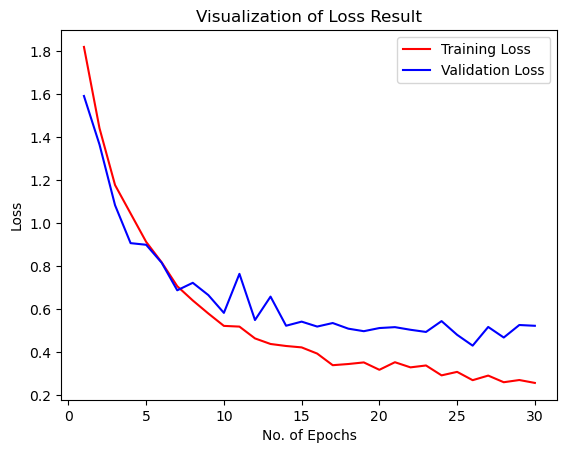

In [167]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

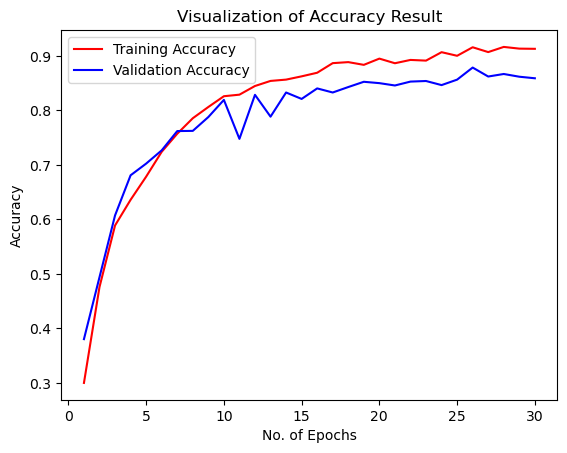

In [169]:
#Visualization of Accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [ ]:
#Precision and Confusion Matrix

In [175]:
X_test.shape

(2796, 150, 150, 1)

In [177]:
y_pred = model.predict(X_test)
y_pred

88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 477ms/step


array([[2.07738928e-08, 9.99937654e-01, 1.81987139e-06, ...,
        1.26404075e-06, 7.51937932e-07, 6.97283156e-07],
       [1.82340140e-04, 7.90612467e-06, 2.08088186e-05, ...,
        1.30718545e-05, 1.93970609e-05, 3.12464454e-06],
       [1.59438799e-11, 6.34964352e-18, 4.65195704e-09, ...,
        2.38928433e-09, 2.36444466e-04, 1.81392856e-08],
       ...,
       [4.99887021e-09, 7.84306498e-14, 2.05687680e-12, ...,
        1.02030535e-04, 8.12201415e-06, 7.80482935e-07],
       [1.94712484e-04, 1.67923247e-06, 3.46047782e-05, ...,
        9.87847568e-04, 7.42993143e-04, 2.34130323e-02],
       [1.19663766e-02, 7.06579542e-08, 9.86625195e-01, ...,
        1.40235788e-05, 7.45139405e-05, 1.14944379e-03]], dtype=float32)

In [179]:
y_pred.shape

(2796, 10)

In [181]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([1, 5, 3, ..., 4, 4, 2], dtype=int64)

In [183]:
Y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [185]:
Y_test.shape

(2796, 10)

In [187]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([1, 5, 8, ..., 4, 4, 2], dtype=int64)

In [189]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [191]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.97      0.91      0.94       290
   classical       0.96      1.00      0.98       272
     country       0.92      0.92      0.92       296
       disco       0.94      0.98      0.96       263
      hiphop       0.99      0.92      0.95       294
        jazz       0.98      0.93      0.96       269
       metal       0.95      0.98      0.96       289
         pop       0.96      0.95      0.95       296
      reggae       0.93      0.92      0.93       257
        rock       0.83      0.93      0.88       270

    accuracy                           0.94      2796
   macro avg       0.94      0.94      0.94      2796
weighted avg       0.94      0.94      0.94      2796



In [193]:
# confusion matrix
cm

array([[264,   0,   7,   3,   0,   1,   1,   1,   5,   8],
       [  0, 271,   0,   0,   0,   1,   0,   0,   0,   0],
       [  3,   2, 272,   0,   0,   2,   0,   1,   2,  14],
       [  0,   0,   0, 259,   0,   0,   0,   1,   2,   1],
       [  1,   1,   0,   2, 271,   0,   5,   5,   4,   5],
       [  0,   5,   1,   0,   0, 251,   3,   0,   4,   5],
       [  0,   0,   3,   0,   0,   0, 282,   0,   0,   4],
       [  0,   1,   6,   2,   2,   0,   0, 280,   0,   5],
       [  1,   0,   3,   6,   1,   0,   0,   2, 236,   8],
       [  3,   1,   5,   3,   0,   1,   5,   1,   0, 251]], dtype=int64)

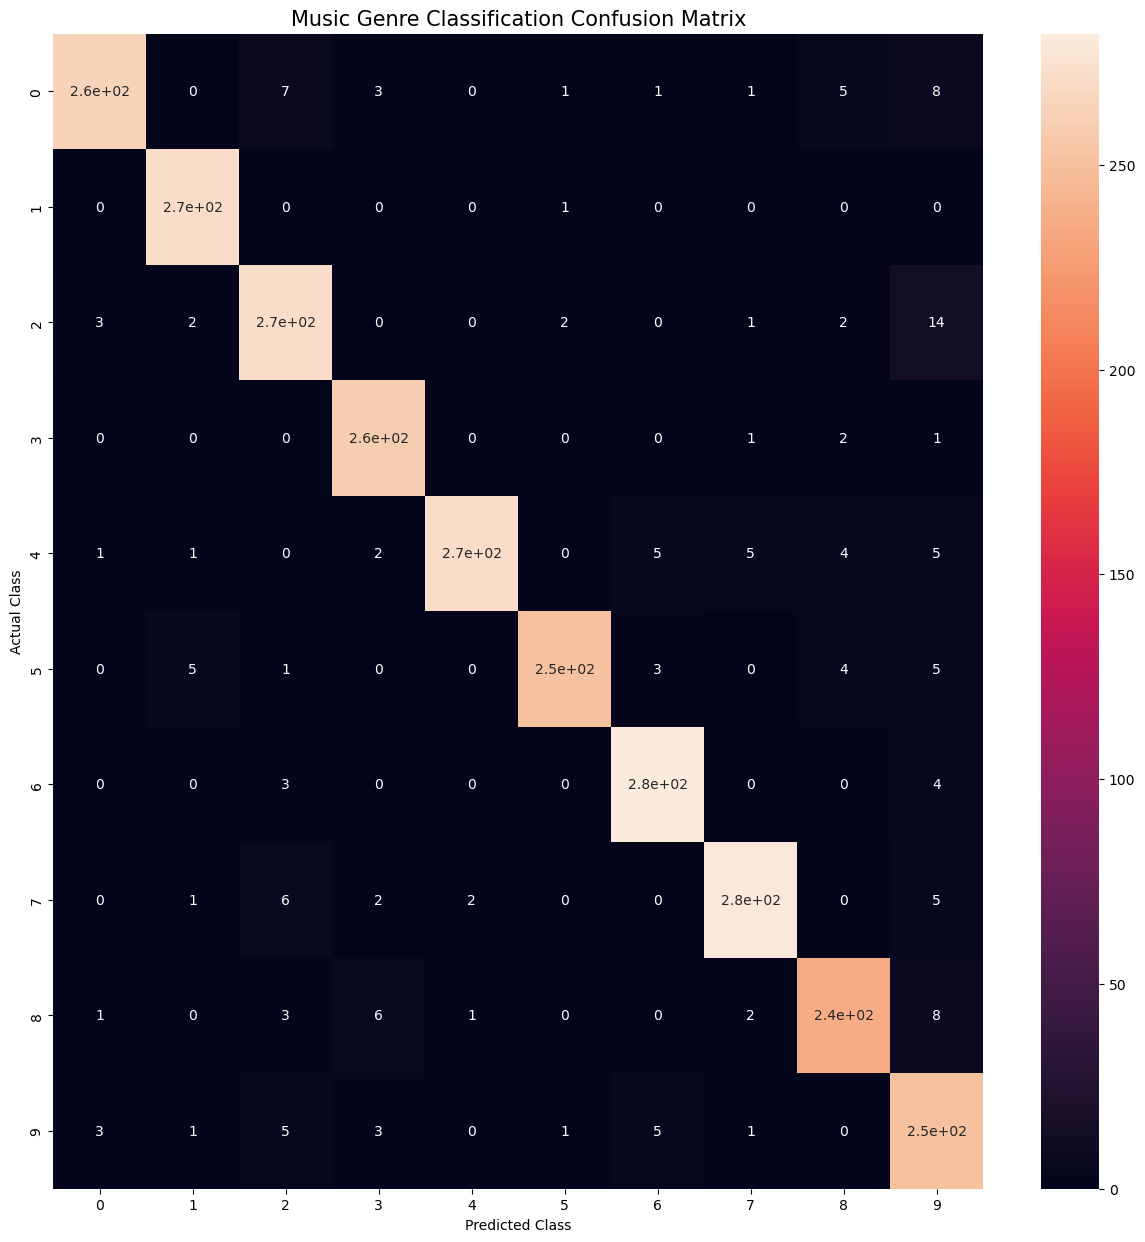

In [195]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()